# Title

## Contents 
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">Amphora type frequency per year in types/context date ranges</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Site count per year in types/context date ranges</span>](#4)  <a id="four"></a>   
5. [<span style="color:black">Amphora type count per year in types/context date ranges</span>](#5)  <a id="five"></a>  
6. [<span style="color:black">Plot line graphs</span>](#6) <a id="six"></a> 

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [1]:
import sys

sys.path.append("../sonata")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from calculation import sum_freq_per_year, year_freq_df, year_object_count_df
from plot import plot_graph 

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [2]:
data = pd.read_csv("../../data/Sonata_data_main.csv") 

start_dates = ["Amphora_type_lower_date", "Lower_context_date"]
end_dates = ["Amphora_type_upper_date", "Upper_context_date"]

freq_dates = {}
site_count_dates = {}
type_count_dates = {}

list_of_dfs = []

### [<span style="color:black">3. Amphora type frequency per year in types/context date ranges</span>](#three) <a id="3"></a>

In [3]:
for start, end in zip(start_dates, end_dates):

    df = data.groupby(["Amphora_type", start, end])["Frequency"].sum()
    df = df.reset_index()
    df = df.rename(columns = {"Frequency":"summed_freq"})

    df1 = sum_freq_per_year(data = df,
                            sum_freq = "summed_freq",
                            lower_date = start,
                            upper_date = end)

    freq = year_freq_df(data = df1,     
                        lower_date =  start,
                        upper_date = end,
                        sum_freq = "Sum_freq_per_year")   
    
    if "Amphora" in start or "Amphora" in end: 
        key = "Type dates"  
    else:
        key = "Context dates" 
    freq_dates[key] = freq
        
list_of_dfs.append(freq_dates)

### [<span style="color:black">4. Site count per year in types/context date ranges</span>](#four) <a id="4"></a>  

In [4]:
for start, end in zip(start_dates, end_dates):

    df = data.groupby(["Amphora_type", start, end])["Grouped_sites"].apply(lambda x: ",".join(x))
    df = df.apply(lambda x: x.split(','))
    df = df.reset_index()
    df = df.rename(columns = {"Grouped_sites": "List_of_sites"})
    
    count_values = year_object_count_df(data = df, 
                                        lower_date = start,  
                                        upper_date = end,
                                        object_list = "List_of_sites") 

    if "Amphora" in start or "Amphora" in end: 
        key = "Type dates"  
    else:
        key = "Context dates" 
    site_count_dates[key] = count_values
        
list_of_dfs.append(site_count_dates)              

### [<span style="color:black">5. Amphora type count per year in types/site date ranges</span>](#five) <a id="5"></a>

In [5]:
for start, end in zip(start_dates, end_dates):
    df = data.groupby([start, end])["Amphora_type"].apply(list)
    df = df.reset_index()
    df = df.rename(columns = {"Amphora_type":"List_of_types"})
    
    type_count = year_object_count_df(data = df,  
                                     lower_date = start,  
                                     upper_date = end,
                                     object_list = "List_of_types",
                                     name = "Type count")  

    if "Amphora" in start or "Amphora" in end: 
        key = "Type dates"  
    else:
        key = "Context dates" 
    type_count_dates[key] = type_count
        
list_of_dfs.append(type_count_dates)      

### [<span style="color:black">6. Plot line graphs</span>](#six) <a id="6"></a>

/var/folders/bs/lyfh9c_s12v5pvzwc_lsglnxg6gst1/T/ipykernel_5052/1599897046.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/var/folders/bs/lyfh9c_s12v5pvzwc_lsglnxg6gst1/T/ipykernel_5052/1599897046.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/var/folders/bs/lyfh9c_s12v5pvzwc_lsglnxg6gst1/T/ipykernel_5052/1599897046.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


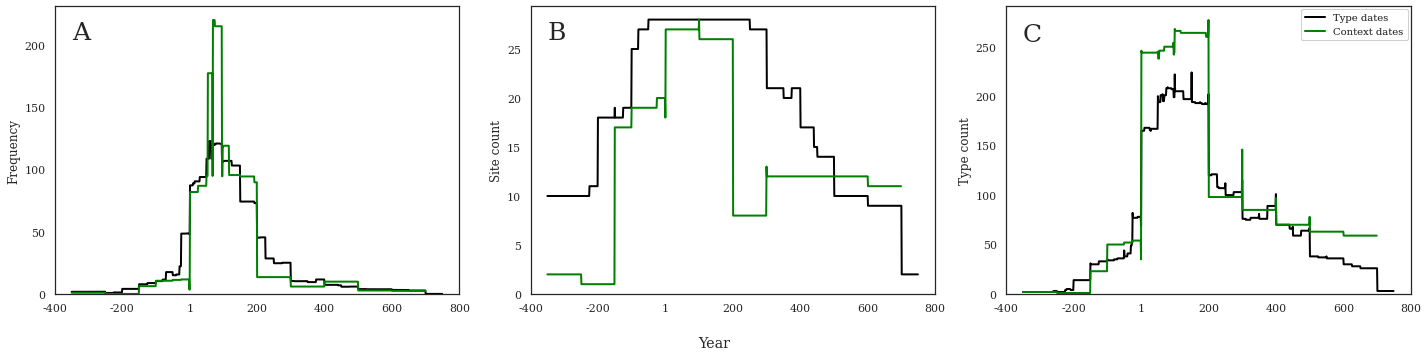

In [6]:
sns.set_style("white", {"font.family":"serif", "font.serif":"Times New Roman"}) 

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].set_xlim([-400, 800])
axs[1].set_xlim([-400, 800])
axs[2].set_xlim([-400, 800])

for ax, df in zip(axs.ravel(), list_of_dfs):
    plot_graph(dicts_of_df = df,
               palette=["black", "green"],
               ax = ax,
               linewidth = 2)

    ax.set_ylim(0, None)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
    ax.set_xlabel(None)
    ax.get_legend().remove()
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
    handles, labels = ax.get_legend_handles_labels() 
    fig.legend(handles, labels, bbox_to_anchor=(0.985, 0.97), fontsize = 10)

fig.supxlabel("Year")
axs[0].text(-350, 205, "A", fontsize = 25)
axs[1].text(-350, 26, "B", fontsize = 25)
axs[2].text(-350, 256, "C", fontsize = 25)

plt.tight_layout()
plt.savefig("../../figs_Tom/Fig1a-c.png", bbox_inches="tight")